In [9]:
import pandas as pd
from datasets import Dataset, load_dataset, load_from_disk, concatenate_datasets
import os
import threading
import requests
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import shutil

from PIL import PngImagePlugin
LARGE_ENOUGH_NUMBER = 100
PngImagePlugin.MAX_TEXT_CHUNK = LARGE_ENOUGH_NUMBER * (1024**2)

In [10]:
dataset = load_from_disk( r"C:\Users\shirs\Desktop\Image_Captioning_and_CLIP_Model_Deployment\Image_Captioning_GCC_Embeddings_1k") # split="train"
dataset = dataset["train"]
dataset

Dataset({
    features: ['caption', 'image_data', 'image_embeddings', 'text_embeddings'],
    num_rows: 1000
})

In [4]:
from transformers import AutoImageProcessor, AutoTokenizer, VisionEncoderDecoderModel, AutoModel

# image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")
decoder_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased", add_special_tokens=True, force_download=True, resume_download=False)

if decoder_tokenizer.pad_token is None:
    decoder_tokenizer.add_special_tokens({'pad_token': '[PAD]'})

# model = VisionEncoderDecoderModel.from_encoder_decoder_pretrained("google/vit-base-patch16-224-in21k", "bert-base-uncased")
model = VisionEncoderDecoderModel.from_pretrained(r"C:\Users\shirs\Desktop\Image_Captioning_and_CLIP_Model_Deployment\Image Captioning-Fine-Tune ViT-BERT Model Flickr8k\Image_Captioning_Fine_Tune_ViT_BERT_model_flickr8k")
model

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_featur

In [34]:
# Function to perform image retrieval
from torchvision import transforms
# Import an image using PIL
image = Image.open(r"C:\Users\shirs\Desktop\Image_Captioning_and_CLIP_Model_Deployment\Flicker8k_Dataset\47871819_db55ac4699.jpg")

transform = transforms.Compose([   transforms.Resize((224,224)) ,  # Resize the PIL image
                                                transforms.ToTensor()  # Convert the PIL image back to tensor
                                ])
                                        
max_length = 32

def create_caption(image, display=False):
    image = transform( image )
    channels = image.shape[0]
    if channels==1:
        image = torch.stack( [image]*3 , dim=1)
    elif channels==4:
        image = image[:3, :, :]
    image = image.unsqueeze(0)
    predictions = decoder_tokenizer.decode(model.generate(pixel_values=image)[0], skip_special_tokens=True) # 
    caption = predictions.replace(".","") 

    if display:
        plt.imshow(image[0].permute(1,2,0))
        plt.axis('off')
        plt.show()
        print("Caption:", caption)

    return caption

c:\Users\shirs\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\generation\utils.py:1254: UserWarning: Using the model-agnostic default `max_length` (=20) to control thegeneration length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


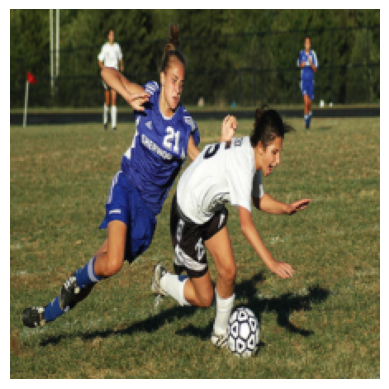

Caption: a man wearing shorts is climbing a wooden ramp with a rope attached to it a


In [36]:
predicted_caption = create_caption(image, display=True)